# Importing libraries and reading from dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv(r"G:\MLProject\SMS-spam Classifier\spam.csv",encoding="latin1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Data Cleaning 
# EDA-Exploratory Data Analysis
# Text Preprocessing
# Model building
# Evaluation
# Improvement
# Website
# Deploy

## 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 cols

df.drop(columns=['Unnamed: 2','Unnamed: 4','Unnamed: 3'],inplace=True)

In [10]:
df.sample()

,v1,v2
4628,ham,Only saturday and sunday holiday so its very d...


In [11]:
# renaming the cols

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
218,ham,I have to take exam with march 3
2404,ham,Please give it 2 or i will pick it up on Tues...
312,ham,He says he'll give me a call when his friend's...
5526,spam,PRIVATE! Your 2003 Account Statement for shows...
4600,spam,FreeMsg: Txt: CALL to No: 86888 & claim your r...


In [12]:
# label encoding

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['target']=encoder.fit_transform(df['target'])
# ham:0 spam:1

In [14]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#check for duplicates
df.duplicated().sum()

403

In [17]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## 2.EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

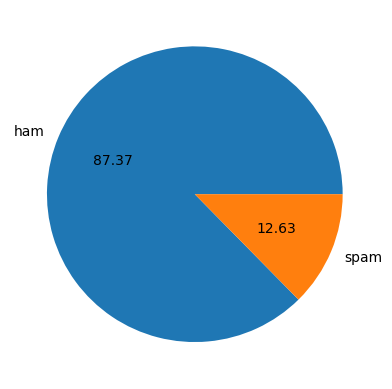

In [23]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
# Data is imbalanced

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters']=df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# spam sms
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
# ham sms
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

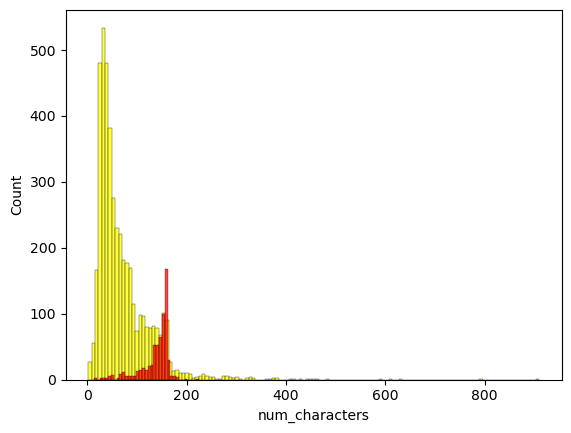

In [36]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'],color="yellow")
sns.histplot(df[df['target']==1]['num_characters'],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

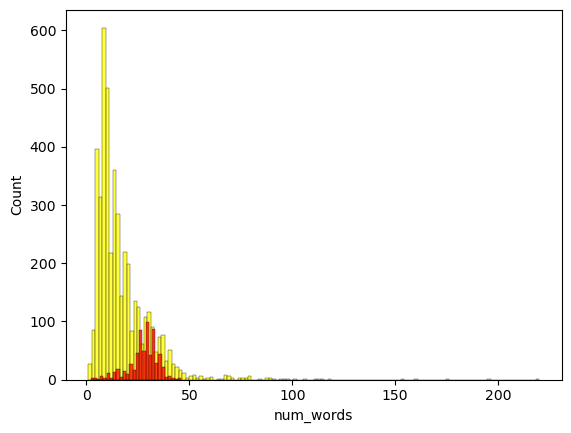

In [37]:
sns.histplot(df[df['target']==0]['num_words'],color="yellow")
sns.histplot(df[df['target']==1]['num_words'],color="red")

<Axes: xlabel='num_sentences', ylabel='Count'>

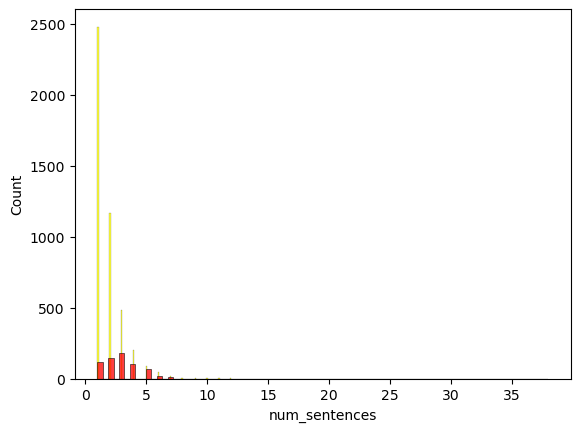

In [38]:
sns.histplot(df[df['target']==0]['num_sentences'],color="yellow")
sns.histplot(df[df['target']==1]['num_sentences'],color="red")

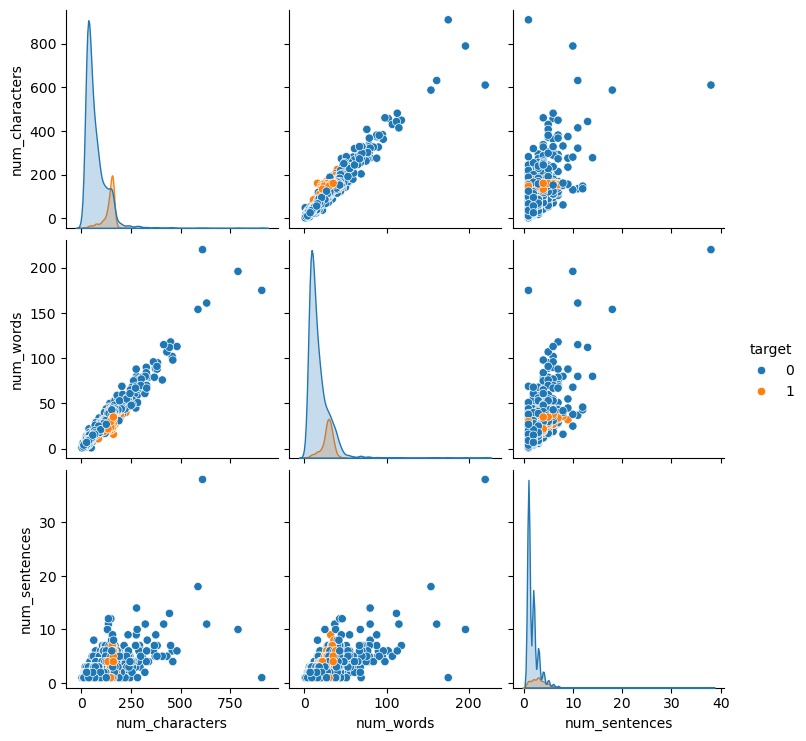

In [39]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
    ### Lower case
    ### Tokenization
    ### Removing special characters
    ### Removing stop words and punctuation
    ### Stemming
    

In [41]:
import string 
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [42]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [44]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [45]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Loving")

'love'

In [46]:
df['transform_text']=df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud

wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [49]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

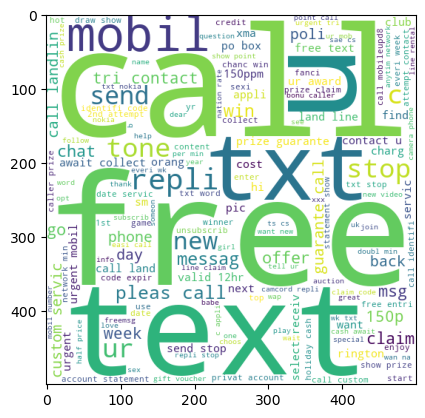

In [50]:
plt.imshow(spam_wc)

In [51]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

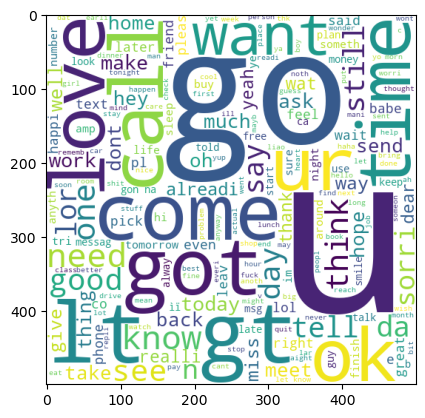

In [52]:
plt.imshow(ham_wc)

In [53]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

In [55]:
from collections import Counter


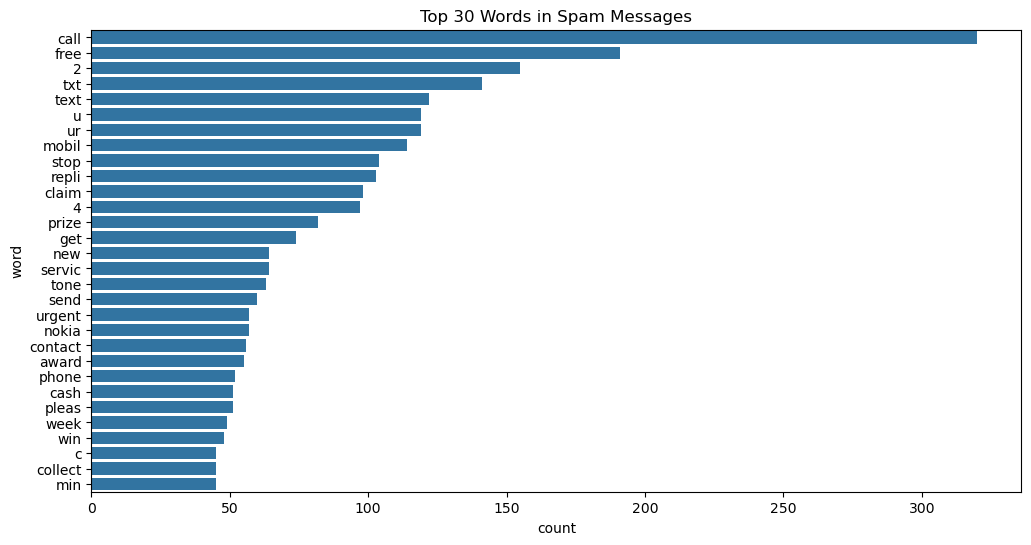

In [56]:
# Top 30 spam words
top_spam = Counter(spam_corpus).most_common(30)
df_top_spam = pd.DataFrame(top_spam, columns=['word','count'])

# Plot using keyword arguments
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=df_top_spam)
plt.title("Top 30 Words in Spam Messages")
plt.show()


In [57]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

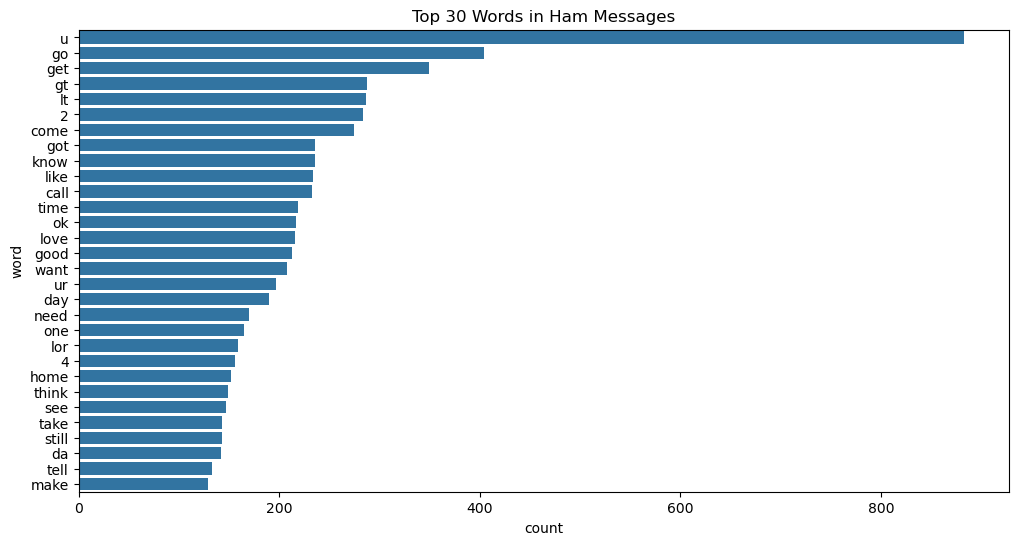

In [59]:
# Top 30 ham words
top_ham = Counter(ham_corpus).most_common(30)
df_top_ham = pd.DataFrame(top_ham, columns=['word','count'])

# Plot using keyword arguments
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=df_top_ham)
plt.title("Top 30 Words in Ham Messages")
plt.show()


## 4.Model Building

In [250]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [254]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [256]:
x.shape

(5169, 3000)

In [258]:
y=df['target'].values

In [260]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [262]:
from sklearn.model_selection import train_test_split

In [264]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [266]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [268]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [270]:
# Bad performer due to low precision_score

gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [272]:

mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [274]:
# Best performer due to High precision_score

bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [201]:
# tfidf --->>> multinomialNB

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [205]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=42)
abc=AdaBoostClassifier(n_estimators=50,random_state=42)
bc=BaggingClassifier(n_estimators=50,random_state=42)
etc=ExtraTreesClassifier(n_estimators=50,random_state=42)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=42)
xgb=XGBClassifier(n_estimators=50,random_state=42)

In [207]:
# dictionary

clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [209]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [211]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.97678916827853, 0.9548872180451128)

In [212]:
from sklearn.metrics import accuracy_score, precision_score


In [215]:
acc_score=[]
prec_score=[]

for name,cls in clfs.items():
    current_accuracy,current_precision=train_classifier(cls,x_train,y_train,x_test,y_test)

    print("For",name)
    print("Accuracy ",current_accuracy)
    print("Precision ",current_precision)

    acc_score.append(current_accuracy)
    prec_score.append(current_precision)

For SVC
Accuracy  0.97678916827853
Precision  0.9548872180451128
For KN
Accuracy  0.9042553191489362
Precision  1.0
For NB
Accuracy  0.9729206963249516
Precision  0.9915966386554622
For DT
Accuracy  0.9332688588007737
Precision  0.8275862068965517
For LR
Accuracy  0.9468085106382979
Precision  0.8688524590163934
For RF
Accuracy  0.9700193423597679
Precision  0.9830508474576272


C:\Users\karan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy  0.9506769825918762
Precision  0.8671875
For BgC
Accuracy  0.9613152804642167
Precision  0.8776978417266187
For ETC
Accuracy  0.9777562862669246
Precision  0.9841269841269841
For GBDT
Accuracy  0.9468085106382979
Precision  0.96875
For xgb
Accuracy  0.9661508704061895
Precision  0.9435483870967742


In [217]:
performance_df=pd.DataFrame({"Algorithm":  clfs.keys(), "Accuracy" :acc_score,"Precision score":prec_score})

In [219]:
performance_df

,Algorithm,Accuracy,Precision score
0,SVC,0.976789,0.954887
1,KN,0.904255,1.000000
2,NB,0.972921,0.991597
3,DT,0.933269,0.827586
4,LR,0.946809,0.868852
5,RF,0.970019,0.983051
6,AdaBoost,0.950677,0.867188
7,BgC,0.961315,0.877698
8,ETC,0.977756,0.984127
9,GBDT,0.946809,0.968750


In [221]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

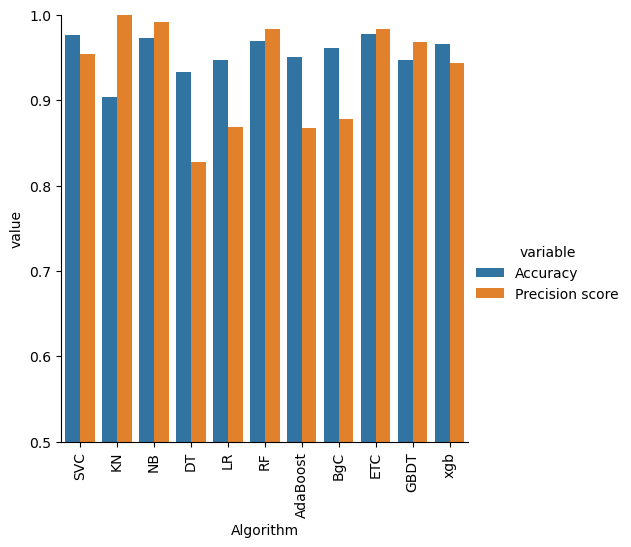

In [223]:
sns.catplot(x="Algorithm", y="value",
            hue="variable",data=performance_df1,kind="bar",height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

In [225]:
# model improvement
# 1. Change the max features parameter of TfIdf

In [227]:
temp_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_max_ft_3000 ":acc_score,"Precision score ":prec_score})

In [231]:
new_df=performance_df.merge(temp_df,on="Algorithm")

In [233]:
new_df_scaled=new_df.merge(temp_df,on="Algorithm")

In [235]:
new_df_scaled

,Algorithm,Accuracy,Precision score,Accuracy_max_ft_3000 _x,Precision score _x,Accuracy_max_ft_3000 _y,Precision score _y
0,SVC,0.976789,0.954887,0.976789,0.954887,0.976789,0.954887
1,KN,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000
2,NB,0.972921,0.991597,0.972921,0.991597,0.972921,0.991597
3,DT,0.933269,0.827586,0.933269,0.827586,0.933269,0.827586
4,LR,0.946809,0.868852,0.946809,0.868852,0.946809,0.868852
5,RF,0.970019,0.983051,0.970019,0.983051,0.970019,0.983051
6,AdaBoost,0.950677,0.867188,0.950677,0.867188,0.950677,0.867188
7,BgC,0.961315,0.877698,0.961315,0.877698,0.961315,0.877698
8,ETC,0.977756,0.984127,0.977756,0.984127,0.977756,0.984127
9,GBDT,0.946809,0.968750,0.946809,0.968750,0.946809,0.968750


## use MultinomialNB as best algo

In [246]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [279]:
import pickle

pickle.dump(tfidf, open(r"G:\MLProject\SMS-spam Classifier\vectorizer.pkl", 'wb'))
pickle.dump(mnb, open(r"G:\MLProject\SMS-spam Classifier\model.pkl", 'wb'))
